<h1>Binary classification task</h1>

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<strong>Read data</strong>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [3]:
test.head(10)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   
5       0  ...         0         0         0         0         0         0   
6       0  ...         0         0         0         0         0         0   
7       0  ...         0         0         0         0         0         0   
8       0  ...         0         0         0         0         0         0   
9       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         0         0         0         0  
6         0         0         0         0  
7         0         0         0         0  
8         0         0         0         0  
9         0         0         0         0  

[10 rows x 784 columns]

In [4]:
train.head(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   
5       0  ...         0         0         0         0         0         0   
6       0  ...         0         0         0         0         0         0   
7       0  ...         0         0         0         0         0         0   
8       0  ...         0         0         0         0         0         0   
9       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         0         0         0         0  
6         0         0         0         0  
7         0         0         0         0  
8         0         0         0         0  
9         0         0         0         0  

[10 rows x 785 columns]

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
test.isnull().sum().sum()

0

In [8]:
train.isnull().sum().sum()

0

Since there are no null entries, we don't need to deal with missing values.

><h3>Data analysis</h3>
Somewhere I will analise only a part of data, becouse this dataset has over 700 features.

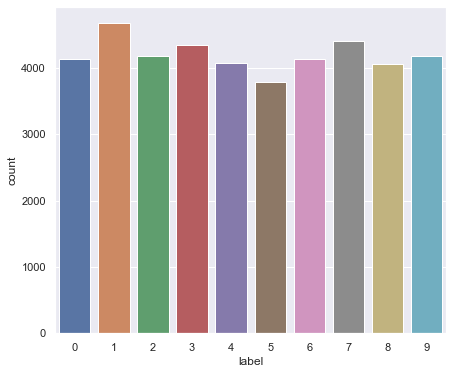

In [17]:
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(train['label'])
plt.show()

In [25]:
def draw_hist(temp_df, bin_size = 15):
    ax = sns.distplot(temp_df)
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()
    print("Skewness is {}".format(temp_df.skew()))
    print("Mean is {}".format(np.median(temp_df)))
    print("Median is {}".format(np.mean(temp_df)))

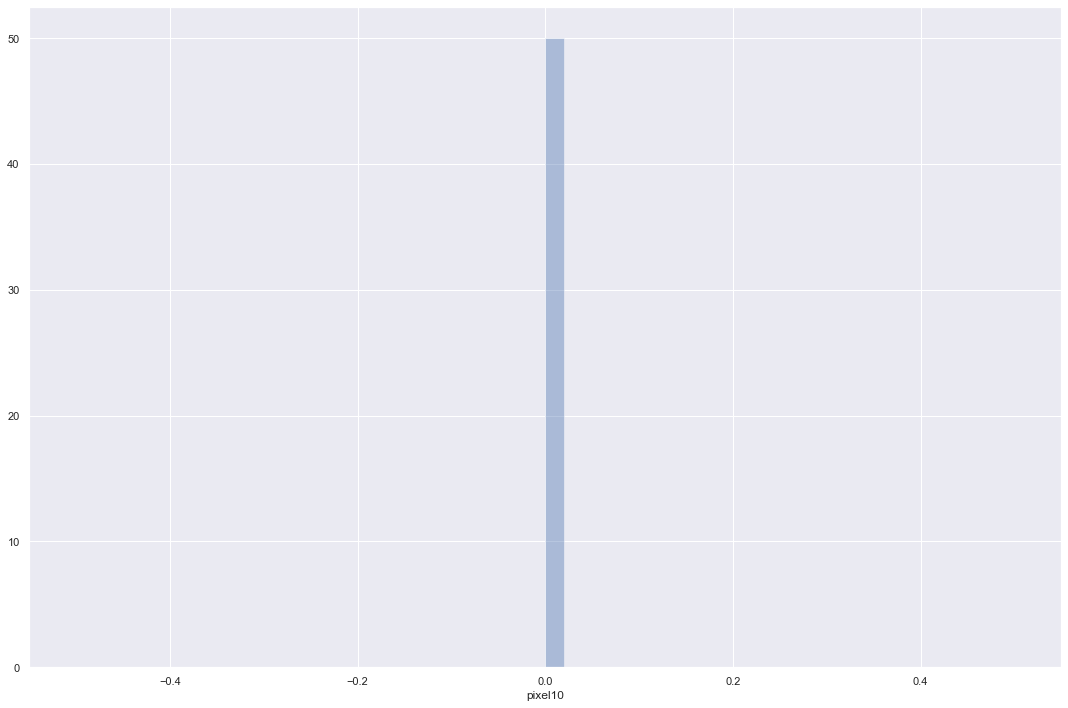

Skewness is 0
Mean is 0.0
Median is 0.0


In [118]:
draw_hist(train['pixel10'])

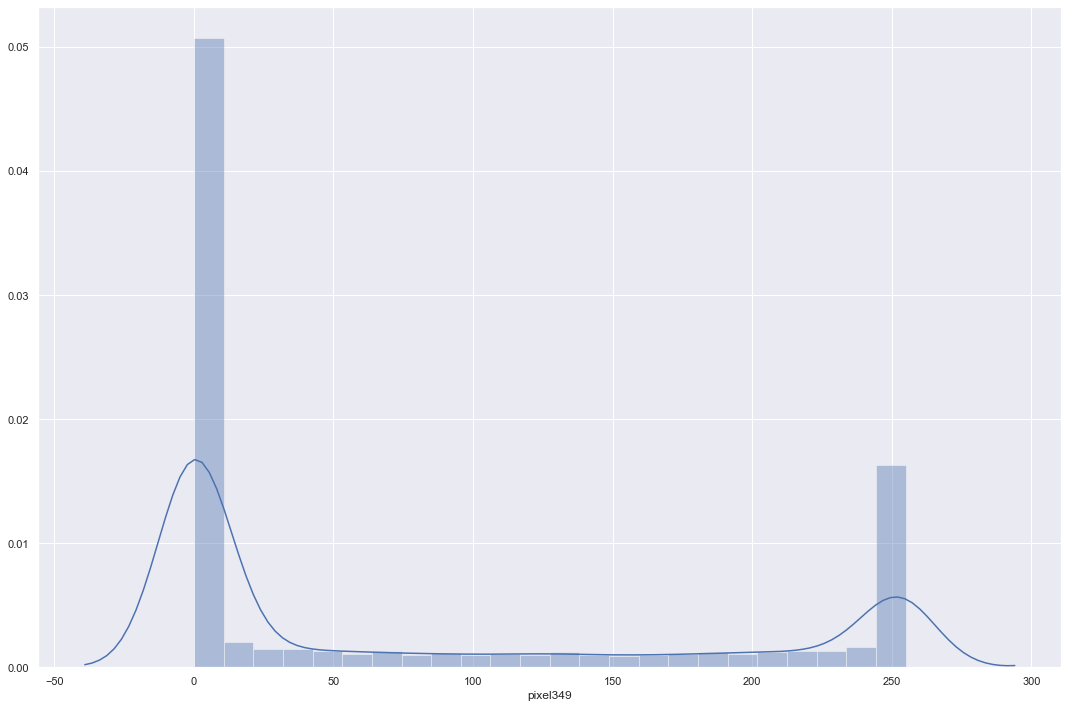

Skewness is 0.7814465661779963
Mean is 0.0
Median is 79.70197619047619


In [119]:
draw_hist(train['pixel349'])

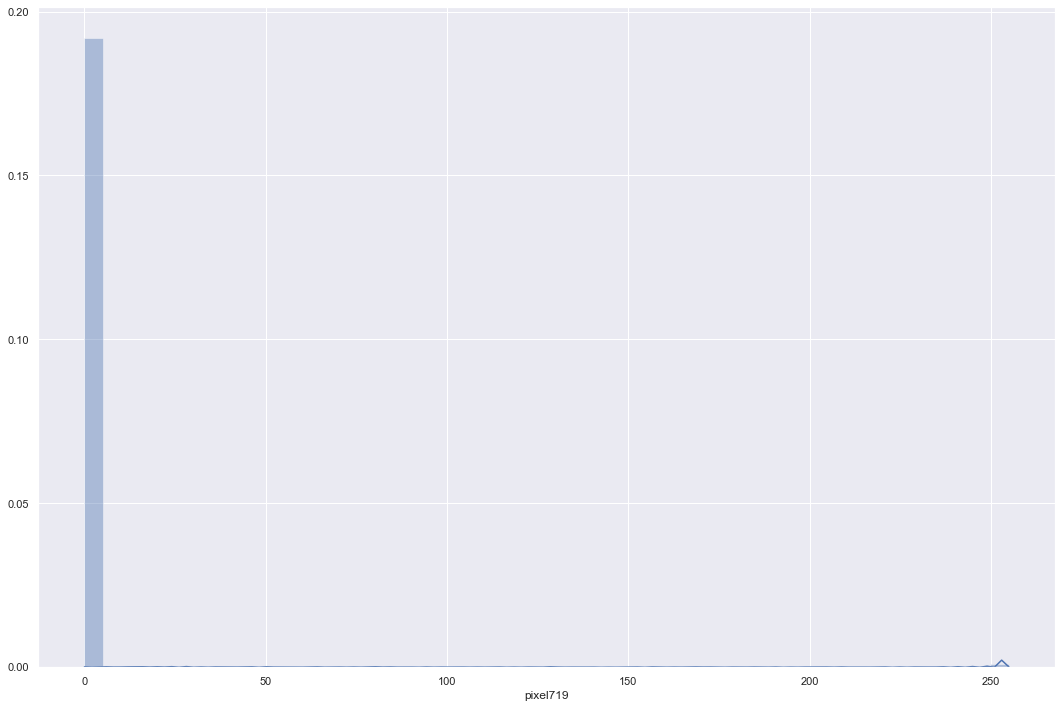

Skewness is 8.576500012478231
Mean is 0.0
Median is 3.1864285714285714


In [121]:
draw_hist(train['pixel719'])

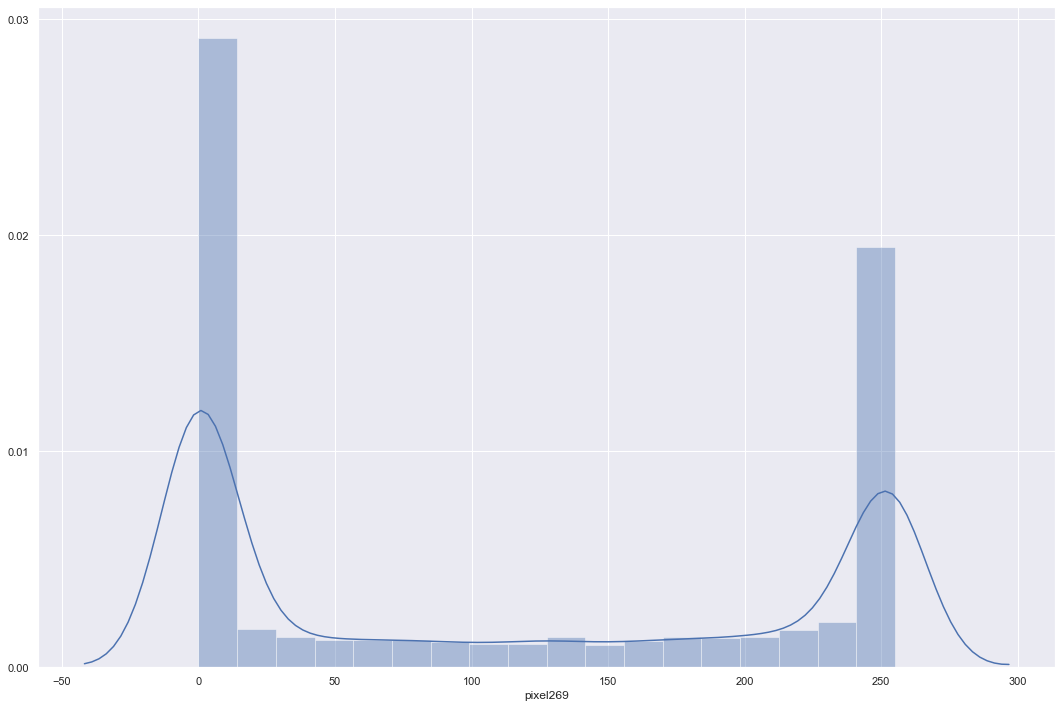

Skewness is 0.23781405233837025
Mean is 76.0
Median is 110.74783333333333


In [122]:
draw_hist(train['pixel269'])

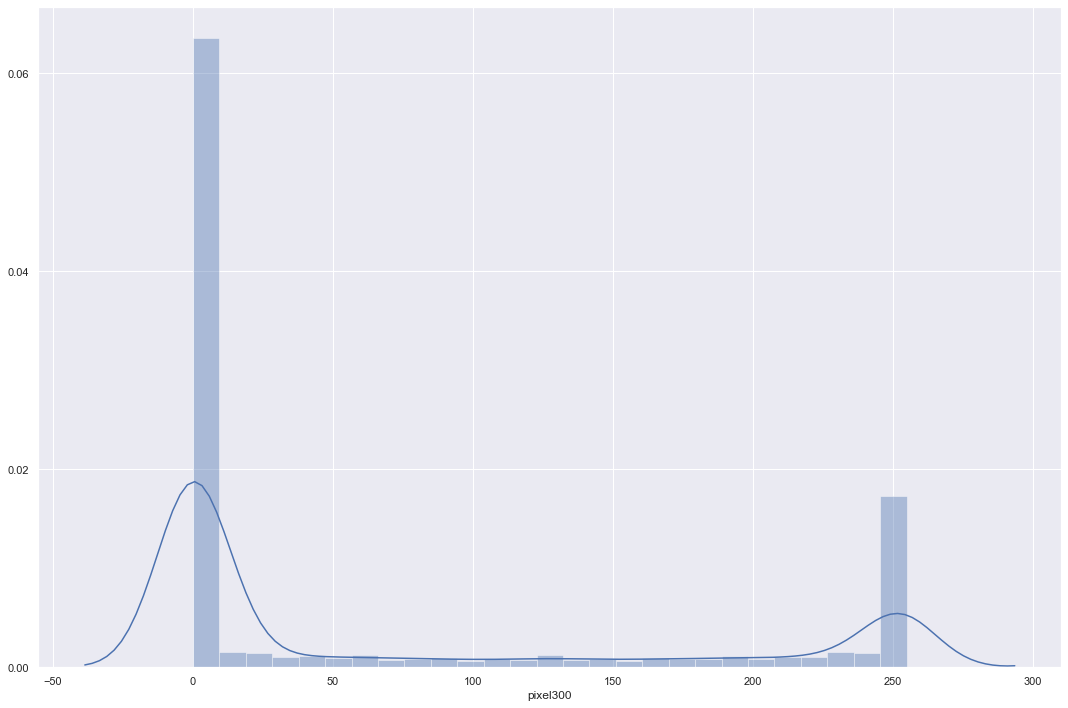

Skewness is 0.9520136335341085
Mean is 0.0
Median is 71.39023809523809


In [117]:
draw_hist(train['pixel300'])

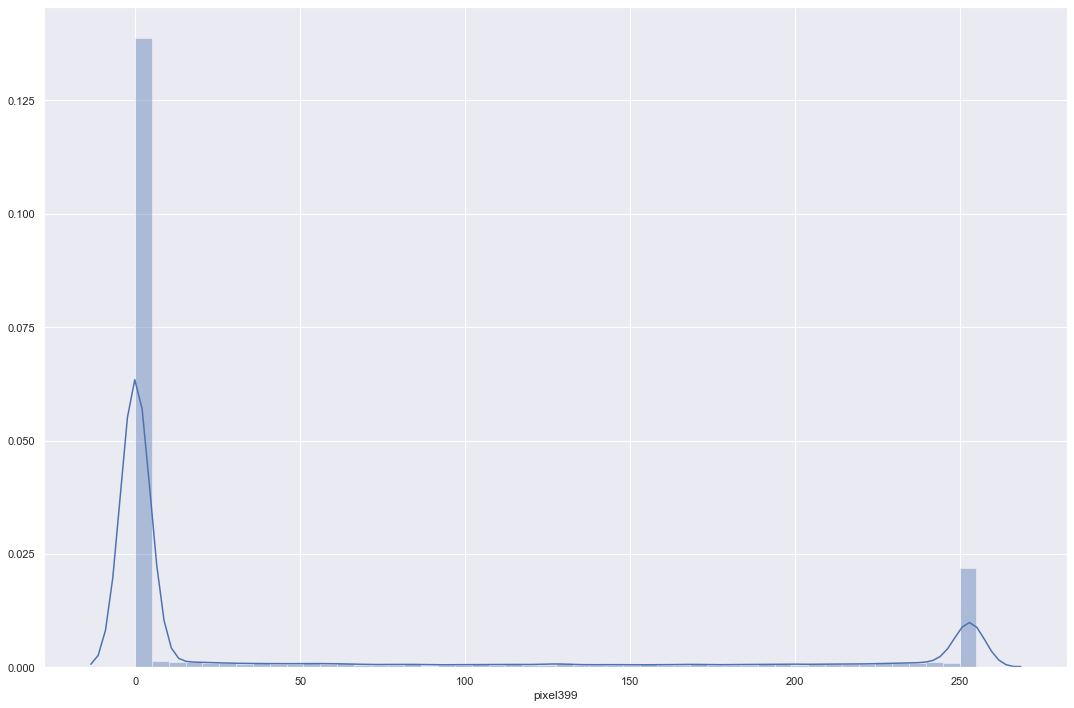

Skewness is 1.4836215870897556
Mean is 0.0
Median is 50.570142857142855


In [123]:
draw_hist(train['pixel399'])

The data can be explained by the fact that the darker pixels are usually located in the middle of the image.

In [152]:
train_analise = train[train.columns[[270, 272, 348, 350, 352, 400, 402, 720]]]
train_analise.insert(0, "label", train["label"], True)
train_analise.head(10)

label  pixel269  pixel271  pixel347  pixel349  pixel351  pixel399  \
0      1       253        88         0       209       254         0   
1      0       200       254         0         0         0       254   
2      1         0         0         0        89       184         0   
3      4        20        65         0         0         0         0   
4      0       253       253         0         0         0       253   
5      0        18       254         0         0         0        23   
6      7       254       142         0         0        51        20   
7      3         0         0       112       112       218         0   
8      5         0         0         0        25       235         5   
9      3       253         0        24       253       253         0   

   pixel401  pixel719  
0         0         0  
1        29         0  
2         0         0  
3       251         0  
4        99         0  
5       221         0  
6         0         0  
7        32         0  
8       253         0  
9         0         0

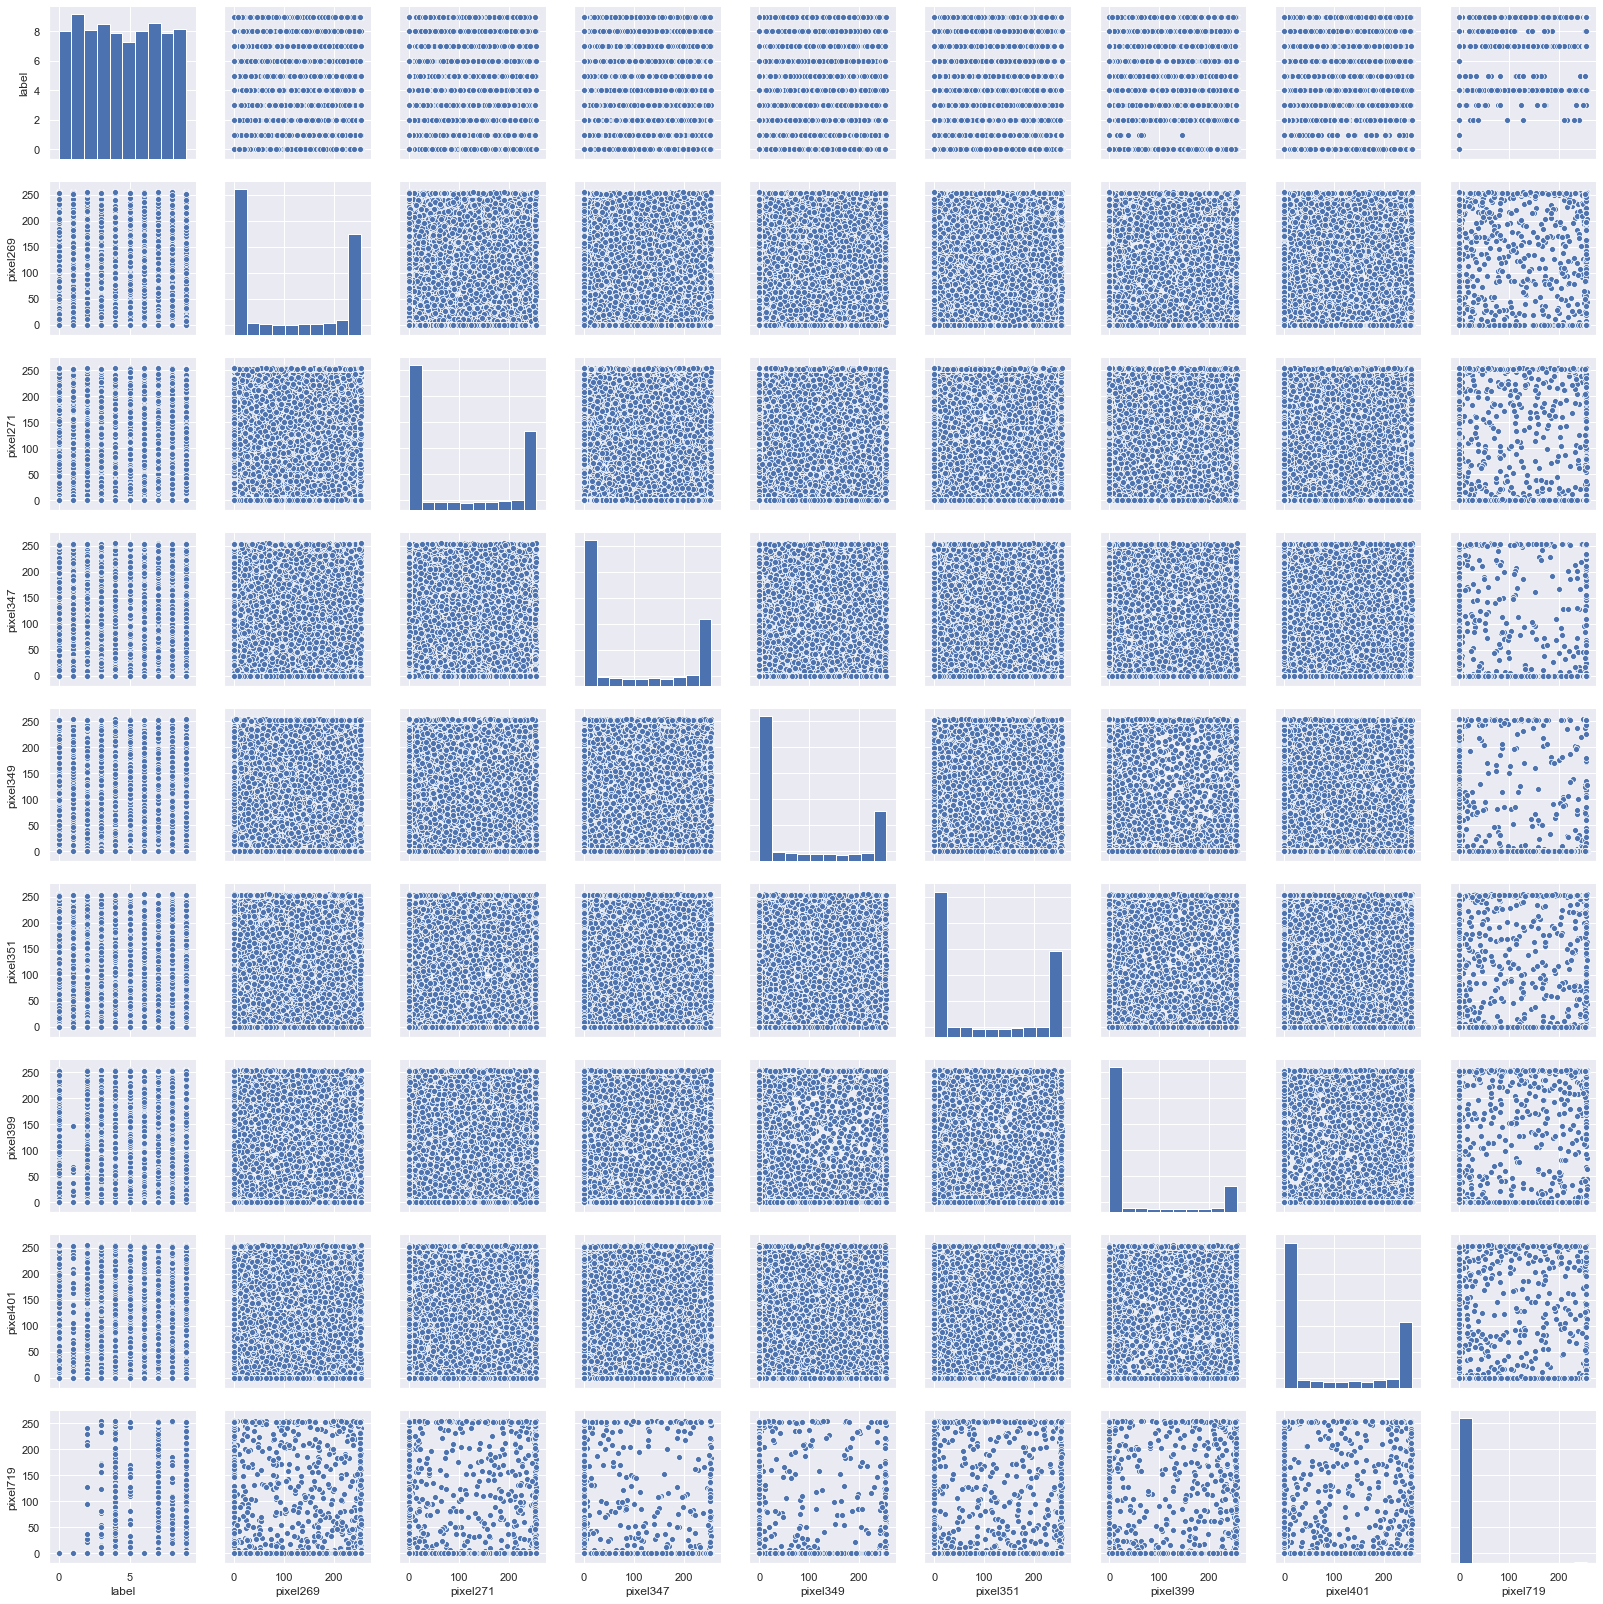

In [153]:
sns.pairplot(train_analise)
plt.show()

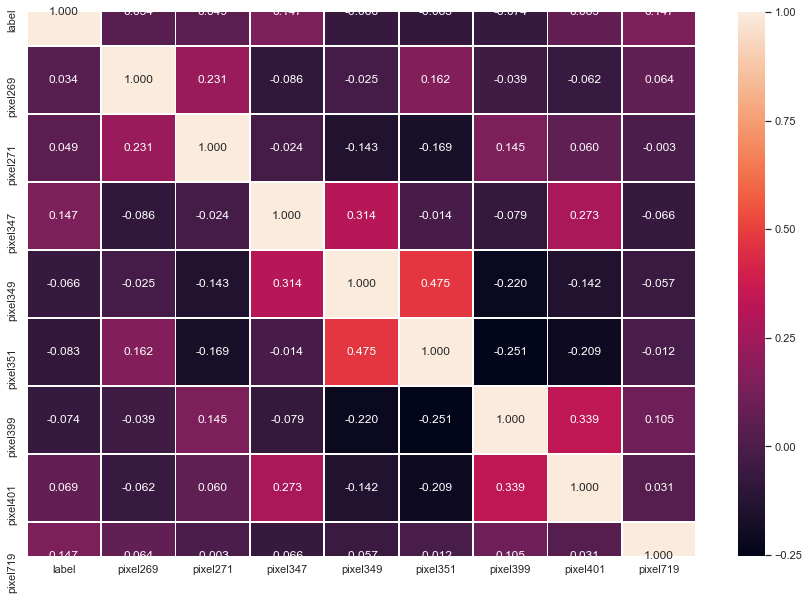

In [154]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train_analise.corr(), annot=True, fmt='.3f', linewidths=1)
plt.show()

Darker pixels are usually near black ones and are lighter ones are closer to white background.

8

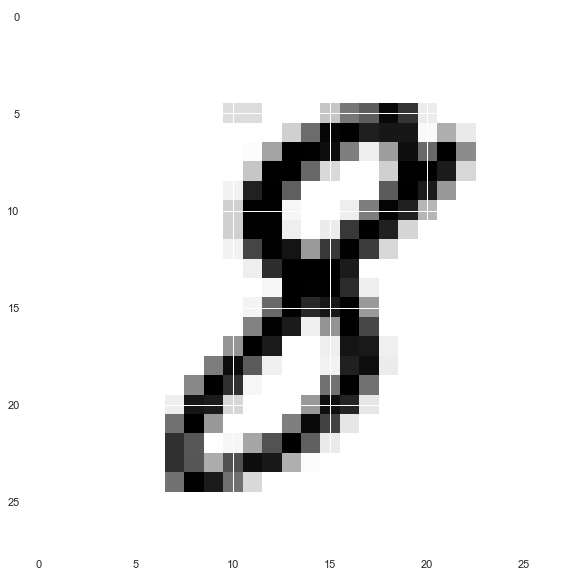

In [155]:
some_digit = X[20]
some_digit_show = plt.imshow(X[20].reshape(28,28), cmap=mpl.cm.binary)
y[20]

But how a fact that the number is 3 or not is correlated with pixels?

In [156]:
y_train_analise_3 = (train["label"] == 3).astype(np.uint8)
y_train_analise_3.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: label, dtype: uint8

In [157]:
train_analise["label"] = y_train_analise_3
train_analise.head(10)

label  pixel269  pixel271  pixel347  pixel349  pixel351  pixel399  \
0      0       253        88         0       209       254         0   
1      0       200       254         0         0         0       254   
2      0         0         0         0        89       184         0   
3      0        20        65         0         0         0         0   
4      0       253       253         0         0         0       253   
5      0        18       254         0         0         0        23   
6      0       254       142         0         0        51        20   
7      1         0         0       112       112       218         0   
8      0         0         0         0        25       235         5   
9      1       253         0        24       253       253         0   

   pixel401  pixel719  
0         0         0  
1        29         0  
2         0         0  
3       251         0  
4        99         0  
5       221         0  
6         0         0  
7        32         0  
8       253         0  
9         0         0

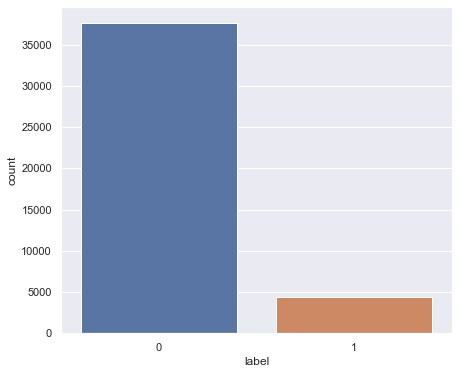

In [158]:
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(y_train_analise_3)
plt.show()

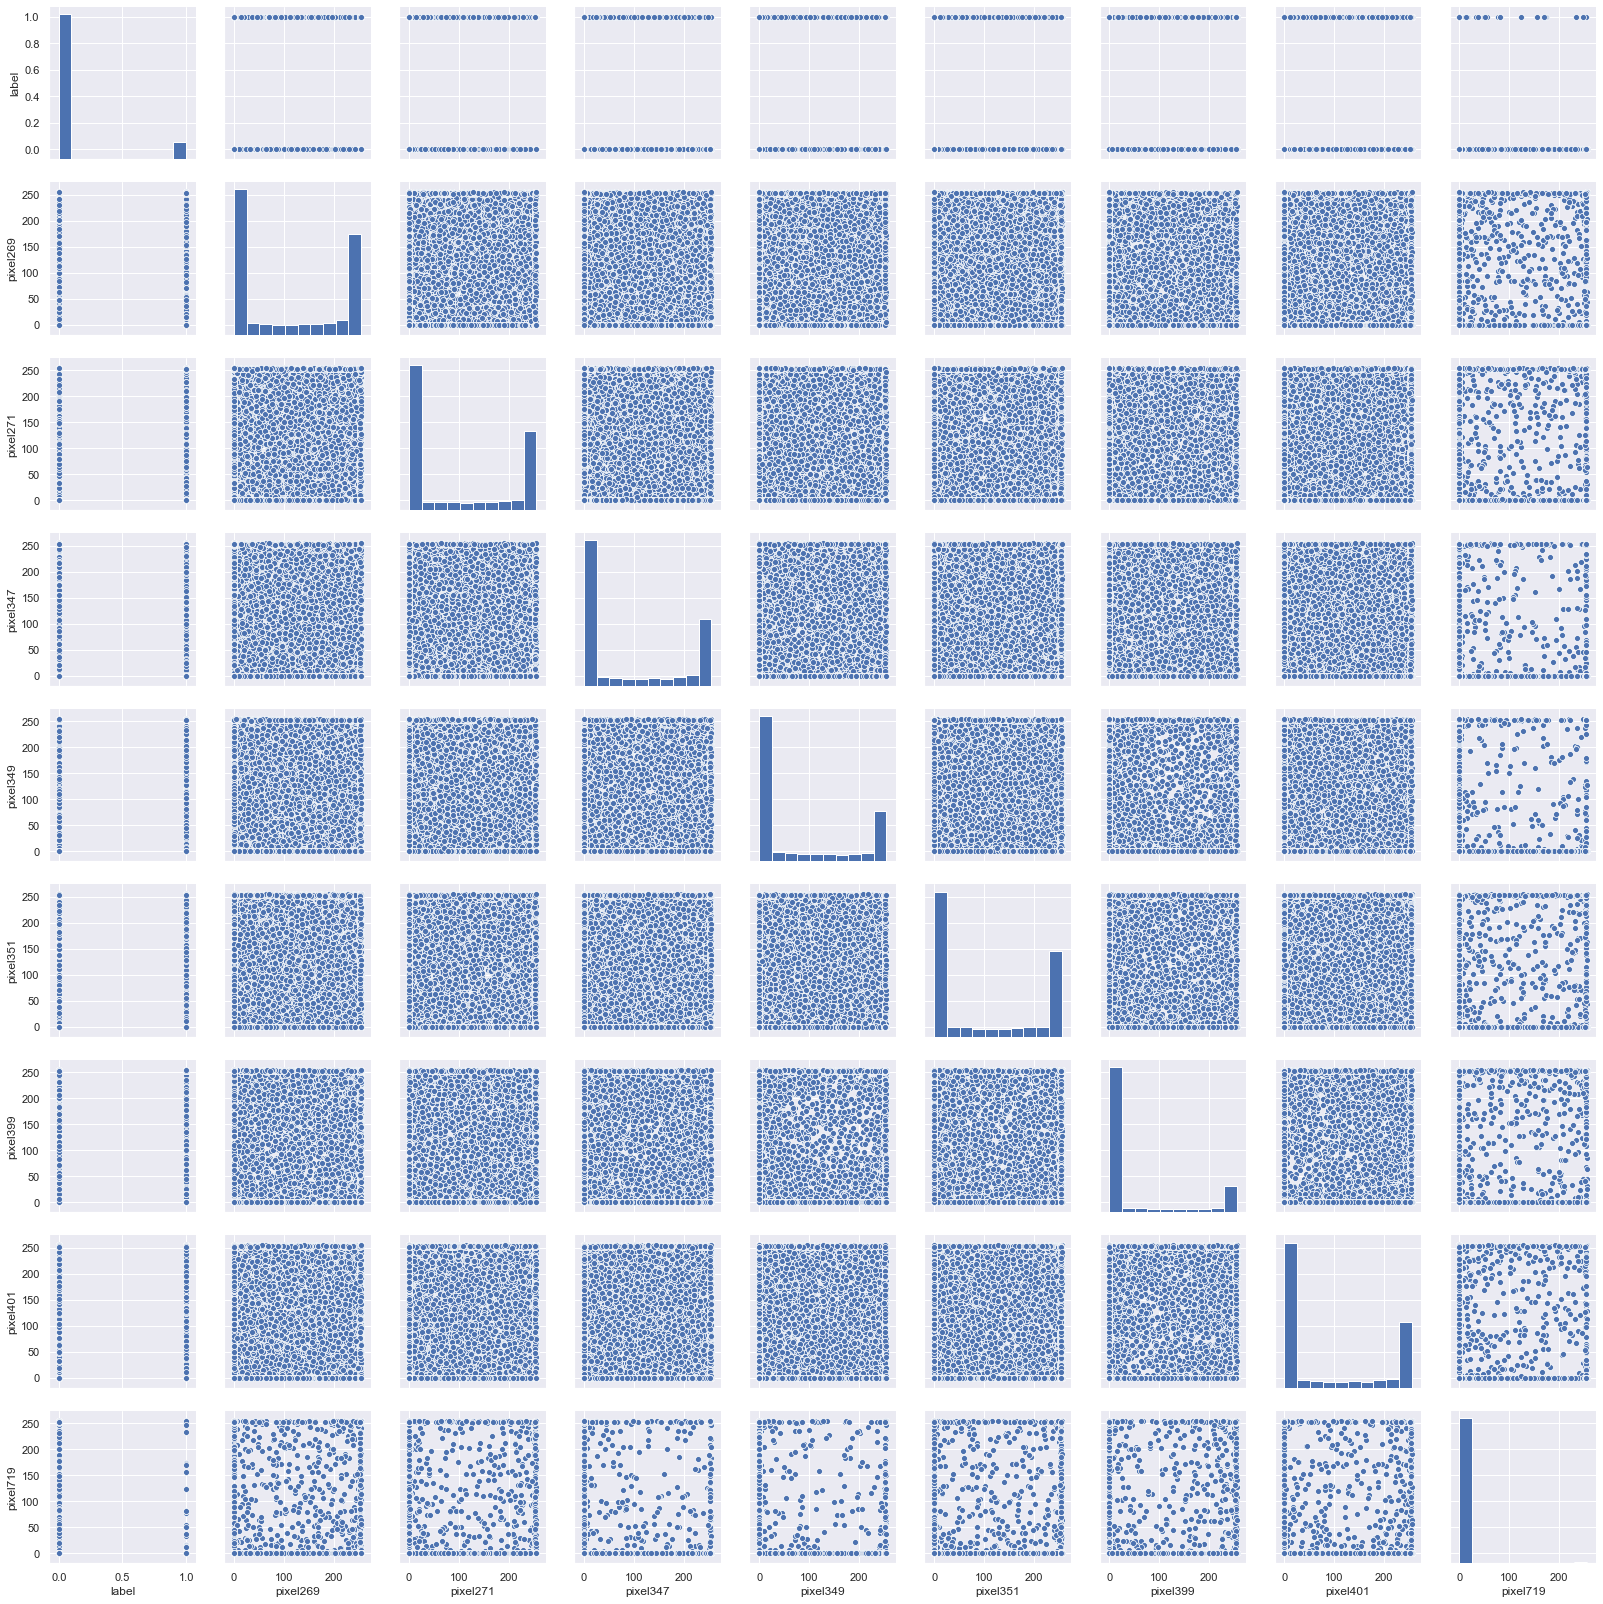

In [159]:
sns.pairplot(train_analise)
plt.show()

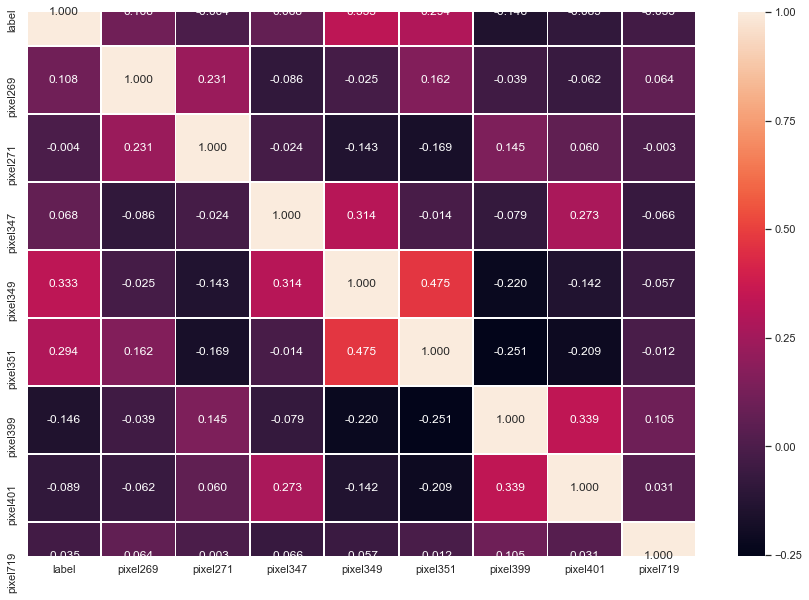

In [160]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train_analise.corr(), annot=True, fmt='.3f', linewidths=1)
plt.show()

><h3>Preparation</h3>
Convert to a binary classification problem. This will be done in this way: one vs rest (we call class 3 - 1 and all
others (0-2,4-9) - 0)

Separate Features and Labels

In [161]:
X, y = train.drop(labels = ["label"],axis = 1).as_matrix(), train["label"]
X.shape

(42000, 784)

In [162]:
y.shape

(42000,)

<ul>
    <li>feature X[25] contains '3' (image_pixel data) pixels 784 = 28*28</li>
    <li>y[25] contain 3 value</li>
</ul>

3

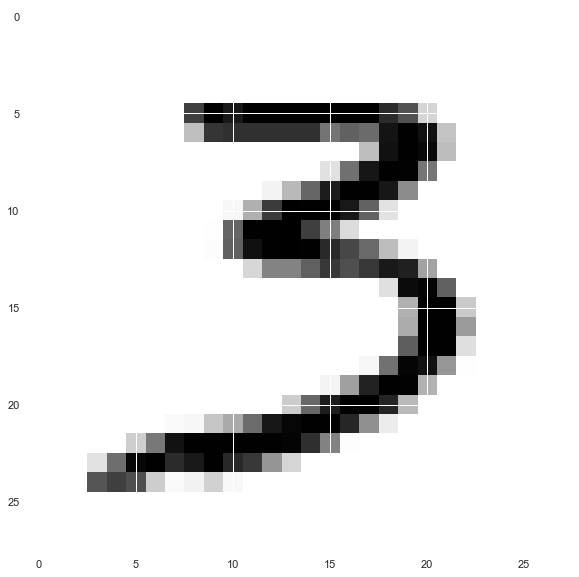

In [163]:
some_digit = X[25]
some_digit_show = plt.imshow(X[25].reshape(28,28), cmap=mpl.cm.binary)
y[25]

In [164]:
y = y.astype(np.uint8)

Spliting Train and Test sets

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

We were just training our model to predict 3.

In [295]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)
y_test_3.head(50)

5457     False
38509    False
25536    False
31803    False
39863    False
30639    False
12986    False
41067    False
30743    False
6839     False
17164    False
21723     True
12272    False
5030     False
25222    False
34680    False
4976      True
19565     True
27947    False
31133    False
3220     False
27143    False
12902    False
10151    False
16341    False
28553    False
1395     False
12793    False
5751     False
11911     True
22756    False
27933    False
16135    False
37896    False
9803     False
26670    False
21373    False
14723     True
22941    False
27652    False
16906    False
41034    False
36782    False
11898    False
18707    False
12637     True
11813    False
18236    False
10276    False
15532    False
Name: label, dtype: bool

Applying Standard scaling to get optimized result

In [167]:
sc = StandardScaler()
X_train[:] = sc.fit_transform(X_train)
X_test[:] = sc.fit_transform(X_test)

><h3>Binary Classifier's</h3>

<strong>SGDClassifier</strong> is a linear classifier that uses SGD for training (that is, looking for the minima of the loss using SGD).

In [168]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
sgd_clf.predict([some_digit])

array([ True])

In [170]:
predictions_sgd = sgd_clf.predict(X_test)
print(predictions_sgd)

[False False False ... False False False]


In [171]:
is_y_test_3 = y_test == 3
is_predicted_3 = predictions_sgd == 1
compare = pd.DataFrame({'Actual value': y_test, 'Prediction': predictions_sgd, 'Accuracy': is_y_test_3 == is_predicted_3})
compare.head(50)

Actual value  Prediction  Accuracy
5457              8       False      True
38509             1       False      True
25536             9       False      True
31803             9       False      True
39863             8       False      True
30639             6       False      True
12986             2       False      True
41067             2       False      True
30743             7       False      True
6839              1       False      True
17164             6       False      True
21723             3       False     False
12272             1       False      True
5030              2       False      True
25222             7       False      True
34680             4       False      True
4976              3        True      True
19565             3       False     False
27947             6       False      True
31133             4       False      True
3220              9       False      True
27143             5       False      True
12902             2       False      True
10151             6       False      True
16341             0       False      True
28553             0       False      True
1395              0       False      True
12793             8       False      True
5751              6       False      True
11911             3        True      True
22756             6       False      True
27933             6       False      True
16135             1       False      True
37896             9       False      True
9803              8       False      True
26670             6       False      True
21373             7       False      True
14723             3       False     False
22941             6       False      True
27652             1       False      True
16906             9       False      True
41034             7       False      True
36782             9       False      True
11898             6       False      True
18707             8       False      True
12637             3        True      True
11813             4       False      True
18236             2       False      True
10276             7       False      True
15532             8       False      True

<strong>CrossValidation</strong>

In [296]:
cv_score_sgd = cross_val_score(sgd_clf, X_test, y_test_3, cv=3, scoring='accuracy')
cv_score_sgd = np.mean(cv_score_sgd)
cv_score_sgd

0.9430906257265098

In [298]:
SGDpred = cross_val_predict(sgd_clf, X_test, y_test_3, cv=3)
print(confusion_matrix(y_test_3, SGDpred))

[[3579  115]
 [ 124  382]]


In [299]:
precision_score(y_test_3, SGDpred)

0.7686116700201208

In [300]:
recall_score(y_test_3, SGDpred)

0.7549407114624506

In [301]:
accuracy_score(y_test_3, SGDpred)

0.9430952380952381

<strong>Save results</strong>

In [177]:
predictions_sgd = sgd_clf.predict(X_test).astype(int)

submissions_sgd=pd.DataFrame({"ImageId": list(range(1,len(predictions_sgd)+1)),
                         "Label": predictions_sgd})
submissions_sgd.to_csv("binary_sgd_clf.csv", index=False, header=True)

<strong>RandomForest</strong> is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [178]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [179]:
forest_clf.predict([some_digit])


array([ True])

In [180]:
predictions_forest = forest_clf.predict(X_test)
print(predictions_forest)

[False False False ... False False False]


In [238]:
is_y_test_3 = y_test == 3
is_predicted_3 = (predictions_forest == 1)
compare = pd.DataFrame({'Actual value': y_test, 'Prediction': predictions_forest, 'Accuracy': is_y_test_3 == is_predicted_3})
compare.head(50)

Actual value  Prediction  Accuracy
5457              8           0      True
38509             1           0      True
25536             9           0      True
31803             9           0      True
39863             8           0      True
30639             6           0      True
12986             2           0      True
41067             2           0      True
30743             7           0      True
6839              1           0      True
17164             6           0      True
21723             3           1      True
12272             1           0      True
5030              2           0      True
25222             7           0      True
34680             4           0      True
4976              3           1      True
19565             3           1      True
27947             6           0      True
31133             4           0      True
3220              9           0      True
27143             5           0      True
12902             2           0      True
10151             6           0      True
16341             0           0      True
28553             0           0      True
1395              0           0      True
12793             8           0      True
5751              6           0      True
11911             3           1      True
22756             6           0      True
27933             6           0      True
16135             1           0      True
37896             9           0      True
9803              8           0      True
26670             6           0      True
21373             7           0      True
14723             3           1      True
22941             6           0      True
27652             1           0      True
16906             9           0      True
41034             7           0      True
36782             9           0      True
11898             6           0      True
18707             8           0      True
12637             3           1      True
11813             4           0      True
18236             2           0      True
10276             7           0      True
15532             8           0      True

<strong>CrossValidation</strong>

In [302]:
cv_score_forest = cross_val_score(forest_clf, X_test, y_test_3, cv=3, scoring='accuracy')
cv_score_forest = np.mean(cv_score_forest)
cv_score_forest

0.9592821288854397

In [303]:
ForestPred = cross_val_predict(forest_clf, X_test, y_test_3, cv=3)
print(confusion_matrix(y_test_3, ForestPred))

[[3687    7]
 [ 164  342]]


In [304]:
precision_score(y_test_3, ForestPred)

0.9799426934097422

In [305]:
recall_score(y_test_3, ForestPred)

0.6758893280632411

In [306]:
accuracy_score(y_test_3, ForestPred)

0.9592857142857143

<strong>Save results</strong>

In [187]:
predictions_forest = forest_clf.predict(X_test).astype(int)

submissions_forest=pd.DataFrame({"ImageId": list(range(1,len(predictions_forest)+1)),
                         "Label": predictions_forest})
submissions_forest.to_csv("binary_forest_clf.csv", index=False, header=True)

<strong>Custom Logistic Regression</strong>

In [232]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    
    def __init__(self, alpha=0.001, epsilon=1e-4, max_iter=100):
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iter = max_iter

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        X = self.prepare_X(X)
        theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
        y = y.reshape((X.shape[0], 1))
        self.X_ = X
        self.y_ = y
        self.coef_, self.Js = self.gradient_descent(self.X_, self.y_, theta)
    
    def predict(self, X):
        X = check_array(X)
        X = self.prepare_X(X)           
        pred = self.h(X, self.coef_)
        y_pred = [1 if (x >= 0.5) else 0 for x in pred]
        return y_pred
    
    def to_classlabel(self, z):
        return z.argmax(axis=1)
    
    def prepare_X(self, X):
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new
    
    def gradient_descent(self, X, y, theta):
        self.n_iter = 0
        m = X.shape[0]
        J_history = []
        J = self.cost_function(X, y, theta)
        J_history.append(J)
        for i in range(self.max_iter):
            self.n_iter = i
            delta = self.derivative_theta(X, y, theta)
            theta = theta - self.alpha * delta
            J = self.cost_function(X, y, theta)
            J_history.append(J)
            if abs(J.max()-J_history[-2].max()) < self.epsilon:
                break
        return theta, J_history

    
    def sigmoid(self, z):
        g = 1 / (1 + np.exp(-z))
        return g
    
    def h(self, X, theta):
        z = np.dot(X, theta)
        return self.sigmoid(z)
    
    def cost_function(self, X, y, theta):
        m = X.shape[0]
        if m ==0:
            return None
        h_X = self.h(X, theta)
        J = - np.sum(y * np.log(h_X) + (1 - y) * np.log(1 - h_X))/m
        return J
    
    def derivative_theta(self, X, y, theta):
        m = X.shape[0]
        if m == 0:
            return None
        h = self.h(X, theta)
        d_theta = (1 / m) * X.T.dot(h - y)
        return d_theta

In [233]:
clg = CustomLogisticRegression(alpha=0.01, epsilon=1e-6, max_iter=1000)
clg.fit(X_train, y_train_3)

In [257]:
bool(clg.predict([some_digit]))

True

In [259]:
predictions_custom = clg.predict(X_test)
print(predictions_custom)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [275]:
is_correct = []
y_test_is_3 = (y_test == 3).values.tolist()
for i in range(len(predictions_custom)):
    is_correct.append(predictions_custom[i] == 1 or not y_test_is_3[i])
compare = pd.DataFrame({'Actual value': y_test, 'Prediction': predictions_custom, 'Accuracy': is_correct})
compare.head(50)

Actual value  Prediction  Accuracy
5457              8           0      True
38509             1           0      True
25536             9           0      True
31803             9           0      True
39863             8           0      True
30639             6           0      True
12986             2           0      True
41067             2           0      True
30743             7           0      True
6839              1           0      True
17164             6           0      True
21723             3           0     False
12272             1           0      True
5030              2           0      True
25222             7           0      True
34680             4           0      True
4976              3           1      True
19565             3           0     False
27947             6           0      True
31133             4           0      True
3220              9           0      True
27143             5           0      True
12902             2           0      True
10151             6           0      True
16341             0           0      True
28553             0           0      True
1395              0           0      True
12793             8           0      True
5751              6           0      True
11911             3           1      True
22756             6           0      True
27933             6           0      True
16135             1           0      True
37896             9           0      True
9803              8           0      True
26670             6           0      True
21373             7           0      True
14723             3           0     False
22941             6           0      True
27652             1           0      True
16906             9           0      True
41034             7           0      True
36782             9           0      True
11898             6           0      True
18707             8           0      True
12637             3           0     False
11813             4           0      True
18236             2           0      True
10276             7           0      True
15532             8           0      True

<strong>CrossValidation</strong>

In [307]:
cv_score_custom = cross_val_score(clg, X_test, y_test_3, cv=3, scoring='accuracy')
cv_score_custom = np.mean(cv_score_custom)
cv_score_custom

0.9552363797367341

In [308]:
CustomLR = cross_val_predict(clg, X_test, y_test_3, cv=3)
print(confusion_matrix(y_test_3, CustomLR))

[[3645   49]
 [ 139  367]]


In [309]:
precision_score(y_test_3, predictions_custom)

0.9155313351498637

In [291]:
recall_score(y_test_3, predictions_custom)

0.6640316205533597

In [292]:
accuracy_score(y_test_3, predictions_custom)

0.9521428571428572

<strong>Save results</strong>

In [254]:
predictions_custom = clg.predict(X_test)

submissions_custom=pd.DataFrame({"ImageId": list(range(1,len(predictions_custom)+1)),
                         "Label": predictions_forest})
submissions_custom.to_csv("custom_clf.csv", index=False, header=True)